# Загрузка данных

Мы будем использовать [выборку Bank Marketing](https://quiltdata.com/package/uciml/bank).
Объектом в выборке является клиент банка, которому совершался звонок с предложением депозитного продукта.
Целевая переменная – согласие на продукт.

Для загрузки данных воспользуемся библиотекой [quilt](https://quiltdata.com).

```bash
pip install quilt
```

In [1]:
# Для первой загрузки
# import quilt
# quilt.install('uciml/bank')
from quilt.data.uciml import bank

bank_full = bank.tables.bank_full()
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
bank_full.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

# Подготовка данных

In [3]:
bank_full.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
import numpy as np
import pandas as pd

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 
            'housing', 'loan', 'contact', 'campaign',
            'pdays', 'previous', 'poutcome']  # 'duration'

cat_features = bank_full[features].select_dtypes(object).columns
num_features = bank_full[features].select_dtypes(np.number).columns
bank_full[num_features]

,age,balance,campaign,pdays,previous
0,58,2143,1,-1,0
1,44,29,1,-1,0
2,33,2,1,-1,0
3,47,1506,1,-1,0
4,33,1,1,-1,0
5,35,231,1,-1,0
6,28,447,1,-1,0
7,42,2,1,-1,0
8,58,121,1,-1,0
9,43,593,1,-1,0


In [5]:
bank_full[cat_features].apply(pd.Series.nunique)

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
poutcome      4
dtype: int64

**Задание.** Произвести one hot кодировку категориальных полей.

Hint: [`pd.concat`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html), [`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

In [6]:
# <вставить код>
X = pd.concat([bank_full[num_features], pd.get_dummies(bank_full[cat_features])], axis=1)
X.shape

(45211, 37)

In [7]:
X.head()

,age,balance,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,-1,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,1
1,44,29,1,-1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,2,1,-1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,1506,1,-1,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,1,1,-1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [8]:
y = bank_full['y'].replace({'yes': 1, 'no': 0})

Разделим выборку по времени

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Извлечение зависимости

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [11]:
cv = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10)

cv_score = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')
cv_score

array([0.73704092, 0.73649033, 0.72987098])

---

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
booster_grid = {'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [2, 3]}

booster = GradientBoostingClassifier(n_estimators=100)

gs_booster = GridSearchCV(booster, booster_grid, scoring='roc_auc',
                          cv=cv, verbose=1, n_jobs=-1, return_train_score=True)

In [14]:
gs_booster.fit(X_train, y_train);
gs_booster.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   16.2s finished


{'learning_rate': 0.1, 'max_depth': 2}

In [15]:
pd.DataFrame(gs_booster.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.931413,0.029188,0.758723,0.770277,0.1,2,"{'learning_rate': 0.1, 'max_depth': 2}",1,0.755945,0.771582,0.761387,0.769799,0.758837,0.769450,0.289388,0.006514,0.002223,0.000934
1,4.560198,0.057873,0.758556,0.783822,0.1,3,"{'learning_rate': 0.1, 'max_depth': 3}",2,0.754009,0.784817,0.761700,0.782527,0.759960,0.784122,0.468909,0.001247,0.003293,0.000959
2,3.700953,0.052536,0.754564,0.762212,0.05,2,"{'learning_rate': 0.05, 'max_depth': 2}",4,0.754571,0.762940,0.756002,0.762720,0.753120,0.760975,0.258529,0.003744,0.001177,0.000879
3,6.527622,0.060207,0.756926,0.772618,0.05,3,"{'learning_rate': 0.05, 'max_depth': 3}",3,0.754259,0.773286,0.760165,0.773044,0.756355,0.771523,0.069685,0.007448,0.002445,0.000780
4,3.468098,0.056204,0.712761,0.713784,0.01,2,"{'learning_rate': 0.01, 'max_depth': 2}",6,0.712577,0.709566,0.713613,0.713100,0.712094,0.718688,0.054445,0.003926,0.000634,0.003756
5,4.061537,0.029687,0.738365,0.742731,0.01,3,"{'learning_rate': 0.01, 'max_depth': 3}",5,0.741994,0.742446,0.738749,0.741149,0.734350,0.744600,0.411477,0.000472,0.003133,0.001423


---

**Задание** Подберите параметр количества соседей для KNeighborsClassifier в диапозоне [1, 5, 10], делая при этом нормировку StandardScaler

Hint: для [`make_pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [17]:
knn_grid = {'kneighborsclassifier__n_neighbors': [1, 5, 10]}

In [18]:
gs_knn = GridSearchCV(knn, knn_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1, return_train_score=True)

In [19]:
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  1.1min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.4min finished


{'kneighborsclassifier__n_neighbors': 10}

In [20]:
pd.DataFrame(gs_knn.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_kneighborsclassifier__n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.504893,13.570609,0.578171,0.998945,1,{'kneighborsclassifier__n_neighbors': 1},3,0.574108,0.998883,0.586997,0.999280,0.573408,0.998672,0.083432,1.238653,0.006247,0.000252
1,0.997838,24.994907,0.665913,0.904052,5,{'kneighborsclassifier__n_neighbors': 5},2,0.665580,0.904331,0.680378,0.902106,0.651778,0.905718,0.352019,0.452797,0.011678,0.001487
2,1.189790,28.309429,0.693395,0.855982,10,{'kneighborsclassifier__n_neighbors': 10},1,0.693662,0.855472,0.706572,0.854647,0.679950,0.857827,0.256101,1.276486,0.010870,0.001347


---

**Задание** Перед запуском Knn произведите отбор самых важных признаков, используя [`SelectFromModel`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html), перебирая значения `threshold` в диапозоне ['0.1*mean', '0.5*mean', 'mean'], а в качестве модели взять [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)

In [23]:
pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

poutcome_success       0.393443
age                    0.165183
balance                0.107311
pdays                  0.093195
contact_unknown        0.050724
campaign               0.049542
housing_no             0.035110
previous               0.025353
marital_single         0.011906
loan_yes               0.010342
education_secondary    0.007733
education_tertiary     0.007332
job_technician         0.005493
poutcome_other         0.005218
loan_no                0.003183
job_admin.             0.003063
job_unknown            0.003014
marital_married        0.002524
job_retired            0.002172
poutcome_failure       0.002028
job_entrepreneur       0.001996
job_self-employed      0.001925
job_unemployed         0.001895
education_primary      0.001776
marital_divorced       0.001746
contact_cellular       0.001409
default_no             0.001312
housing_yes            0.001231
poutcome_unknown       0.001089
default_yes            0.000936
job_student            0.000684
job_blue

In [24]:
knn_sel = make_pipeline(
    StandardScaler(),
    SelectFromModel(DecisionTreeClassifier(max_depth=10)),
    KNeighborsClassifier(n_neighbors=5)
)

knn_sel_grid = {'selectfrommodel__threshold': ['0.1*mean', '0.5*mean', 'mean']}

gs_knn_sel = GridSearchCV(knn_sel, knn_sel_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1, return_train_score=True)

In [25]:
gs_knn_sel.fit(X_train, y_train)
gs_knn_sel.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   10.3s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   31.7s finished


{'selectfrommodel__threshold': '0.1*mean'}

In [26]:
pd.DataFrame(gs_knn_sel.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_selectfrommodel__threshold,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.773329,11.627233,0.668939,0.905457,0.1*mean,{'selectfrommodel__threshold': '0.1*mean'},1,0.670524,0.903408,0.682849,0.905893,0.653442,0.907069,0.282632,1.203367,0.012057,0.001526
1,0.871576,1.154764,0.658180,0.902675,0.5*mean,{'selectfrommodel__threshold': '0.5*mean'},3,0.667897,0.900718,0.658785,0.903459,0.647857,0.903847,0.220891,0.420768,0.008192,0.001393
2,0.566710,0.869576,0.661833,0.901549,mean,{'selectfrommodel__threshold': 'mean'},2,0.668297,0.900795,0.665640,0.904388,0.651561,0.899463,0.096190,0.107628,0.007343,0.002080


# Stacking

In [27]:
booster = gs_booster.best_estimator_
knn = gs_knn.best_estimator_
knn_sel = gs_knn_sel.best_estimator_

**Задание** Написать функцию, которая возвращает прогноз по схеме кросс-валидации на обучающей выборке и на тесте.

Hint: не забудьте использовать метод `'predict_proba'` для [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)

In [28]:
from sklearn.model_selection import cross_val_predict


def meta_feature(clf, X_train, y_train, X_test, cv):
    cv_pred_train = cross_val_predict(clf, X_train, y_train, 
                                      method='predict_proba', cv=cv, n_jobs=-1, verbose=1)[:, 1]
    clf.fit(X_train, y_train)
    pred_test = clf.predict_proba(X_test)[:, 1]
    return cv_pred_train, pred_test

In [29]:
meta_train = pd.DataFrame()
meta_test = pd.DataFrame()

meta_train['booster'], meta_test['booster'] = meta_feature(booster, X_train, y_train, X_test, cv)
meta_train['knn'    ], meta_test['knn'    ] = meta_feature(knn,     X_train, y_train, X_test, cv)
meta_train['knn_sel'], meta_test['knn_sel'] = meta_feature(knn_sel, X_train, y_train, X_test, cv)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.4s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.0s finished


In [30]:
meta_train.head()

,booster,knn,knn_sel
0,0.145674,0.0,0.0
1,0.243254,0.2,0.2
2,0.025492,0.1,0.0
3,0.124259,0.0,0.0
4,0.153321,0.2,0.0


In [31]:
from sklearn.metrics import roc_auc_score
meta_test.apply(lambda x: roc_auc_score(y_test, x))

booster    0.767651
knn        0.694697
knn_sel    0.668607
dtype: float64

In [32]:
meta_clf = GradientBoostingClassifier()
meta_clf.fit(meta_train, y_train)

roc_auc_score(y_test, meta_clf.predict_proba(meta_test)[:, 1])

0.7648771967083433

---

## Домашнее Задание. Information value
Реализовать функцию подсчета [information value](http://ucanalytics.com/blogs/information-value-and-weight-of-evidencebanking-case). 

* в функции признак должен разбиваться на `num_buck` бакетов.
* для каждого бакета подсчитайте величину
$$
    \left(    \frac{tr}{all\_tr} -       \frac{1 - tr}{1 - all\_tr} \right) \cdot
    \left(log(\frac{tr}{all\_tr}) -  log(\frac{1 - tr}{1 - all\_tr})\right) \cdot
    \frac{cnt}{all\_cnt},
$$
    * $tr$ - доля целевой переменной в бакете (target rate)
    * $all\_tr$ - доля целевой переменной во всей выборке
    * $cnt$ - количество объектов в бакете
    * $all_cnt$ - количество обектов во всей выборке
    
* Если в бакете объекты только одного класса, то будут проблемы со взятием логарифма. Для этого значения $tr$ надо обрезать снизу – 0.001, а сверху 0.999 (hint: [`np.clip`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html))

In [33]:
import pandas as pd 
import numpy as np

def jitter(a_series, noise_reduction=1000000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))

def information_value(feature, target, num_buck=10):
    data = pd.DataFrame({'feature': feature, 'tr': target})
    if list(feature.unique())==[0,1] or list(feature.unique())==[1,0]:
        feature = feature + jitter(feature);
    data['buckets'] = pd.qcut(feature, q=num_buck, duplicates='drop')
    data['count'] = 1
    
    all_tr = data['tr'].mean()
    all_count = data['count'].sum()

    data_agg = data.groupby('buckets').agg({'tr': 'mean', 'feature' : 'mean', 'count': 'sum'})
    
    data_agg['tr'] = np.clip(data_agg['tr'], 0.001, 0.999)
    data_agg['iv'] = (data_agg['tr']/all_tr - (1 - data_agg['tr'])/(1 - all_tr)) * (data_agg['count']/all_count) *(np.log(data_agg['tr']/all_tr) - np.log((1 - data_agg['tr'])/(1 - all_tr)))
    
    return data_agg['iv'].sum()

information_value(X['contact_unknown'], y)

0.27977563739167577

## Домашнее Задание. Важность признаков

Для некоторых задач важно уметь отобрать топ самых информативных признаков, выкинув неинформативный хвост.

Произвести сравнение различных способов подсчета важности признаков.

Способы подсчета важности:
* feature importance градиентного бустинга;
* information value;
* feature importance от random forest.

Способ сравнения:
* Фиксируйте одну модель по выбору.
* В качестве признаков нужно использовать топ-n от итоговых признаков по критерию важности.
* Построить зависимость качества на тесте от количества признаков n для каждого способа.

**Замечание**

Учесть, что первоначальному одному признаку соответствует несколько признаков после one hot кодирования, а в задании под принаком подразумеваются исходные (age, job, ...). При подсчете feature importance от категориальных полей нужно складывать feature importance всех получиных после one hot кодировки бинарных признаков.


Для каких способов совпадают наборы признаков для n = 1, 2, 3?  
Какой способ дает лучшее качество на тесте при использовании 5 признаков?

In [34]:
# Функция суммирования категорильных признаков
def collapse_categories(feature):
    feature = feature.rename(lambda x: x[:x.find('_') if x.find('_')!=-1 else len(x)])
    feature = feature.groupby(feature.index).sum()
    return feature

# Готовим IV
information_values = X.apply(information_value, target=y, axis=0)

information_values_clear = collapse_categories(information_values).sort_values(ascending=False)
information_values_clear

contact      0.476848
poutcome     0.430205
housing      0.349890
job          0.131755
age          0.116017
previous     0.107818
balance      0.101939
loan         0.087254
education    0.076685
marital      0.072523
campaign     0.067606
pdays        0.011978
default      0.007308
dtype: float64

In [35]:
# Готовим feature importance от градиентного бустинга
from sklearn.ensemble import GradientBoostingClassifier

gbooster = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, max_depth = 3).fit(X_train, y_train)
booster_fi = pd.Series(gbooster.feature_importances_, index=X_train.columns).sort_values(ascending=False)
booster_fi_clear = collapse_categories(booster_fi).sort_values(ascending=False)
booster_fi_clear

poutcome     0.662392
age          0.108555
contact      0.073882
housing      0.055695
pdays        0.042619
marital      0.018861
balance      0.018075
campaign     0.010745
job          0.009175
previous     0.000000
loan         0.000000
education    0.000000
default      0.000000
dtype: float64

In [36]:
# Готовим feature importance от случайного леса
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, random_state=42).fit(X_train, y_train)
forest_fi = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
forest_fi_clear = collapse_categories(forest_fi).sort_values(ascending=False)
forest_fi_clear

balance      0.313118
age          0.226322
job          0.084732
campaign     0.083180
poutcome     0.060930
pdays        0.059137
education    0.038068
previous     0.035497
housing      0.032527
marital      0.027178
contact      0.022318
loan         0.013298
default      0.003695
dtype: float64

### Анализ полученных значений
Ни для какого n={1,2,3} n первых признаков не совпадают между собой.

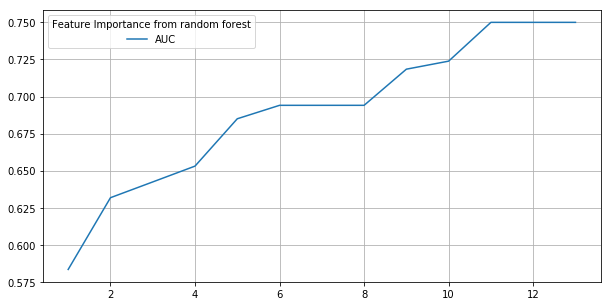

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt 

# Функция отбора кодированных признаков при заданных изначальных
def get_coded_indices(coded_indices, indices):
    
    result = pd.Index([])
    for index in indices:
        result = result.union(coded_indices.where(coded_indices.str.find(index) == 0).dropna())
        
    return result

# auc на подмножестве признаков (фиксированная модель - GradientBoosting)
def n_features_auc(X_train, y_train, X_test, y_test, indices):
    
    X_train = X_train.filter(items=indices)
    X_test = X_test.filter(items=indices)
    
    gbooster = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, max_depth = 3).fit(X_train, y_train)
    auc = roc_auc_score(y_test, gbooster.predict_proba(X_test)[:, 1])
    
    return auc

# получение массива auc по количеству первых отобранных признаков 
def auc_from_n(X_train, y_train, X_test, y_test, features, coded_features):
    count = len(features) + 1;
    arr = np.arange(count, dtype=np.float)
    
    for i in range(1,count):
        arr[i] = n_features_auc(X_train, y_train, X_test, y_test, get_coded_indices(coded_features.index, features[:i].index))
        
    return pd.Series(np.delete(arr, 0)).rename(lambda x: x + 1).rename("AUC");

def plot_auc_from_n(X_train, y_train, X_test, y_test, features, coded_features):
    
    return auc_from_n(X_train, y_train, X_test, y_test, features, coded_features).plot(figsize=(10, 5), grid=True)

plot_auc_from_n(X_train, y_train, X_test, y_test, forest_fi_clear, forest_fi)
plt.legend(title="Feature Importance from random forest");

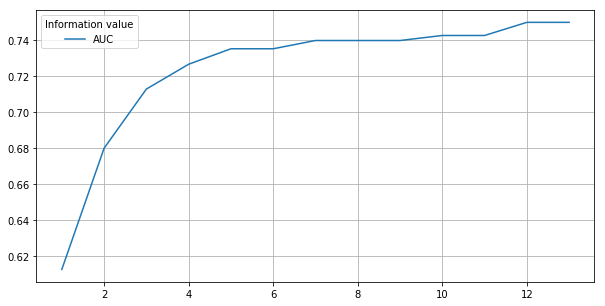

In [38]:
plot_auc_from_n(X_train, y_train, X_test, y_test, information_values_clear, information_values)
plt.legend(title="Information value");

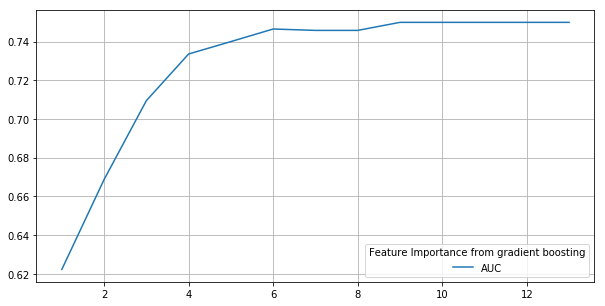

In [39]:
plot_auc_from_n(X_train, y_train, X_test, y_test, booster_fi_clear, booster_fi)
plt.legend(title="Feature Importance from gradient boosting");

### Анализ auc на пяти первых признаках

In [40]:
auc_forest_fi = n_features_auc(X_train, y_train, X_test, y_test, get_coded_indices(forest_fi.index, forest_fi_clear[:5].index))
auc_forest_fi

0.6850202569120515

In [41]:
auc_booster_fi = n_features_auc(X_train, y_train, X_test, y_test, get_coded_indices(booster_fi.index, booster_fi_clear[:5].index))
auc_booster_fi

0.7399919962744596

In [42]:
auc_iv = n_features_auc(X_train, y_train, X_test, y_test, get_coded_indices(information_values.index, information_values_clear[:5].index))
auc_iv

0.7352576067560905

При отборе пяти признаков значение AUC выше при выборе на основании fiture importance от градиентного бустинга. Что логично, ведь в качестве фиксированной модели используется этот самый бустинг. AUC при отборе признаков на основании Information Value близок к предыдущему значению AUC.

## Домашнее Задание. Stacking.

Попробовать стэкинг различных наборов моделей:
* Одну и туже модель с разными гиперпараметрами параметрами (например, бустинг с разным количеством деревьев);
* Разнообразные модели.

Попробовать различные мета классификаторы и простое усреднение.

Получилось ли за счет стэкинга улучшить качество?
Какое метод дает большее качество на тесте?

#### Попробуем три рандом фореста, в качестве мета класификатора используем бустинг и к ближайших соседей

In [43]:

from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(n_estimators=10, max_depth = 4)
forest2 = RandomForestClassifier(n_estimators=25, max_depth = 3)
forest3 = RandomForestClassifier(n_estimators=50, max_depth = 4)

meta_train = pd.DataFrame()
meta_test = pd.DataFrame()

meta_train['forest1'], meta_test['forest1'] = meta_feature(forest1, X_train, y_train, X_test, cv)
meta_train['forest2'], meta_test['forest2'] = meta_feature(forest2, X_train, y_train, X_test, cv)
meta_train['forest3'], meta_test['forest3'] = meta_feature(forest3, X_train, y_train, X_test, cv)

meta_train.head()

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.3s finished


,forest1,forest2,forest3
0,0.102538,0.122007,0.109109
1,0.300412,0.200074,0.232330
2,0.044420,0.054590,0.048256
3,0.104292,0.100839,0.104369
4,0.130704,0.122763,0.139661


In [56]:
meta_clf = GradientBoostingClassifier(learning_rate=0.05, n_estimators=15)
meta_clf.fit(meta_train, y_train)

# AUC при использовании мета класификатора градиентного бустинга
roc_auc_score(y_test, meta_clf.predict_proba(meta_test)[:, 1])

0.751680234311513

In [67]:
meta_clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=500))
meta_clf.fit(meta_train, y_train)

# AUC при использовании мета класификатора k ближайших соседей
roc_auc_score(y_test, meta_clf.predict_proba(meta_test)[:, 1])

0.7449509354814546

In [68]:
# Посмотрим на качество отдельных лесов
meta_test.apply(lambda x: roc_auc_score(y_test, x))

forest1    0.751552
forest2    0.748358
forest3    0.753478
dtype: float64

In [50]:
# Простое усреднение
roc_auc_score(y_test, meta_test.mean(axis=1))

0.7536859746905684

##### Вывод
При использовании в качестве метаклассификатора градиентного бустинга качество получилось не больше наилучшего рандом фореста, но и не хуже худшего.
При использовании в качестве метаклассификатора метода k ближайших соседей качество ухудшилось.
При использовании простого усреднения качество получилось лучше лучшего рандом фореста.

#### Попробуем три различных классификатора, в качестве мета класификатора используем рандом форест и градиентый бустинг

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

c1 = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
c2 = ExtraTreesClassifier(n_estimators=60, max_depth = 6)
c3 = RandomForestClassifier(n_estimators=50, max_depth = 4)

meta_train = pd.DataFrame()
meta_test = pd.DataFrame()

meta_train['c1'], meta_test['c1'] = meta_feature(c1, X_train, y_train, X_test, cv)
meta_train['c2'], meta_test['c2'] = meta_feature(c2, X_train, y_train, X_test, cv)
meta_train['c3'], meta_test['c3'] = meta_feature(c3, X_train, y_train, X_test, cv)

# Посмотрим на качество отдельных классификаторов
meta_test.apply(lambda x: roc_auc_score(y_test, x))

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.1s finished


c1    0.757679
c2    0.749597
c3    0.755031
dtype: float64

In [78]:
meta_clf = GradientBoostingClassifier(learning_rate=0.01, n_estimators=30)
meta_clf.fit(meta_train, y_train)

# AUC при использовании мета класификатора градиентного бустинга
roc_auc_score(y_test, meta_clf.predict_proba(meta_test)[:, 1])

0.7592266505257769

In [79]:
meta_clf = RandomForestClassifier(n_estimators=50, max_depth = 4)
meta_clf.fit(meta_train, y_train)

# AUC при использовании мета класификатора градиентного бустинга
roc_auc_score(y_test, meta_clf.predict_proba(meta_test)[:, 1])

0.7606357074036539

In [80]:
# Простое усреднение
roc_auc_score(y_test, meta_test.mean(axis=1))

0.7560407353844169

##### Вывод
При использовании в качестве метаклассификатора градиентного бустинга качество получилось лучше чем у каждого составляющего класификатора.
При использовании в качестве метаклассификатора случайного леса качество получилось еще лучше чем у бустинга.
При использовании простого усреднения качество получилось не больше наилучшего классификатора, но и не хуже худшего.

##### Лучший способ
Разные классификаторы {AdaBoost, ExtraTrees, RandomForest} и в качестве мета классификатора еще один RandomForest (AUC = ~0.76)